### Classifying movie reviews: a binary classification example
----

Two-class classification, or binary classification, may be the most widely applied kind of machine learning problem. In this example, we 
will learn to classify movie reviews into "positive" reviews and "negative" reviews, just based on the text content of the reviews.

### IMDB dataset

We'll be working with "IMDB dataset", a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.

In [1]:
# Load packages
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import imdb

tf.__version__

'1.13.1'

In [2]:
# Load data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
# View
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(25000,) (25000,)
(25000,) (25000,)


### Decode encoded reviews back to words

In [4]:
# Get word-index dictionary mapping
word_index = imdb.get_word_index()

print("Length of vocab = ", len(word_index))

# Reverse dict to get index-word mapping
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decode the review
# Note that our indices were offset by 3
# Since 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = " ".join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])

print(decoded_review)

Length of vocab =  88584
? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then


In [5]:
# Vectorize input feature
def vectorize_sequences(sequences, dimension=10000):
    # Create a zero matrix
    results = np.zeros((len(sequences), dimension))
    # Iterate over each samples
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Apply method to training data
x_train = vectorize_sequences(train_data)

# Apply method to testing data
x_test = vectorize_sequences(test_data)

In [6]:
print(x_train[0])
print(x_test[0])

[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]


In [7]:
# Vectornize labels
y_train = np.asarray(train_labels).astype("float32")

print(y_train[0])

y_test = np.asarray(test_labels).astype("float32")

print(y_test[0])

1.0
0.0


In [8]:
# Split data for validation
x_val, x_train = x_train[:10000], x_train[10000:]
y_val, y_train = y_train[:10000], y_train[10000:]

print(x_val.shape, y_val.shape)
print(x_train.shape, y_train.shape)

(10000, 10000) (10000,)
(15000, 10000) (15000,)


### Model

In [9]:
from tensorflow.keras import models, layers

In [10]:
def mlp_model(depth, num_classes):
    # initiate model
    model = tf.keras.models.Sequential([
        # Input layer
        tf.keras.layers.Dense(depth, activation="relu", input_shape=(10000,)),
        # Hidden layer
        tf.keras.layers.Dense(depth, activation="relu"),
        # Output layer
        tf.keras.layers.Dense(num_classes, activation="sigmoid")
    ])

    # Compile model
    model.compile(optimizer="rmsprop",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

In [11]:
# Initiate model
model = mlp_model(8, 1)

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
# Train model for 10 epochs in batches of 512 and validate on validation dataset
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
15000/15000 [==============================] - 2s 140us/sample - loss: 0.6241 - acc: 0.5957 - val_loss: 0.5714 - val_acc: 0.6893
Epoch 2/10
15000/15000 [==============================] - 1s 90us/sample - loss: 0.4752 - acc: 0.8489 - val_loss: 0.4177 - val_acc: 0.8699
Epoch 3/10
15000/15000 [==============================] - 1s 90us/sample - loss: 0.3348 - acc: 0.9082 - val_loss: 0.3393 - val_acc: 0.8786
Epoch 4/10
15000/15000 [==============================] - 2s 101us/sample - loss: 0.2566 - acc: 0.9260 - val_loss: 0.3047 - val_acc: 0.8826
Epoch 5/10
15000/15000 [==============================] - 1s 92us/sample - loss: 0.2079 - acc: 0.9397 - val_loss: 0.2821 - val_acc: 0.8907
Epoch 6/10
15000/15000 [==============================] - 1s 89us/sample - loss: 0.1720 - acc: 0.9499 - val_loss: 0.2757 - val_acc: 0.8885
Epoch 7/10
15000/15000 [==============================] - 2s 111us

### Performance visualization

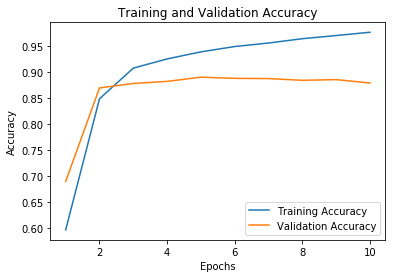

In [13]:
# Plot training accuracy vs validation accuracy
acc = history.history["acc"]
val_acc = history.history["val_acc"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "-", label="Training Accuracy")

plt.plot(epochs, val_acc, "-", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

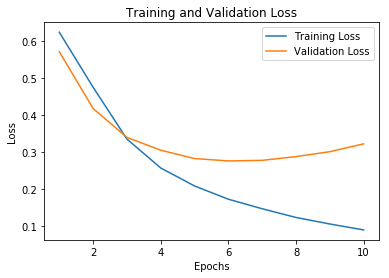

In [14]:
# Plot training loss vs validation loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, "-", label="Training Loss")

plt.plot(epochs, val_loss, "-", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

As you can see, the training loss decreases with every epoch and the training accuracy increases with every epoch. This is "overfitting": after the second epoch, we are over-optimizing on the training data, and we ended up learning representations that are specific to the training data and do not generalize to data outside of the training set.

In [15]:
# Initiate the same model
model = mlp_model(8, 1)

# Train model for 2 epochs in batches of 512 and validate on validation set
history = model.fit(x_train,
                    y_train,
                    epochs=2,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/2
15000/15000 [==============================] - 2s 113us/sample - loss: 0.5454 - acc: 0.7896 - val_loss: 0.4347 - val_acc: 0.8648
Epoch 2/2
15000/15000 [==============================] - 1s 99us/sample - loss: 0.3583 - acc: 0.8986 - val_loss: 0.3453 - val_acc: 0.8832


### Performance visualization

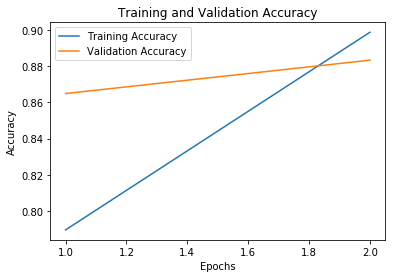

In [16]:
# Plot training accuracy vs validation accuracy
acc = history.history["acc"]
val_acc = history.history["val_acc"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "-", label="Training Accuracy")

plt.plot(epochs, val_acc, "-", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

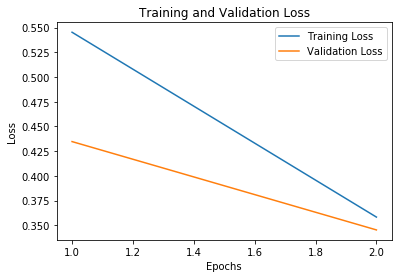

In [17]:
# Plot training loss and validation loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, "-", label="Training Loss")

plt.plot(epochs, val_loss, "-", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

### Testing

In [18]:
# Evaludate on test set
results = model.evaluate(x_test, y_test)

print("loss = {}, accuracy = {}".format(results[0], results[1]))

25000/25000 [==============================] - 2s 67us/sample - loss: 0.3591 - acc: 0.8762
loss = 0.35907500234603884, accuracy = 0.8762400150299072


### Our fairly naive approach achieves an accuracy of 87+%. Hurray!!!